In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [4]:
df = pd.read_csv('Cellphone.csv')

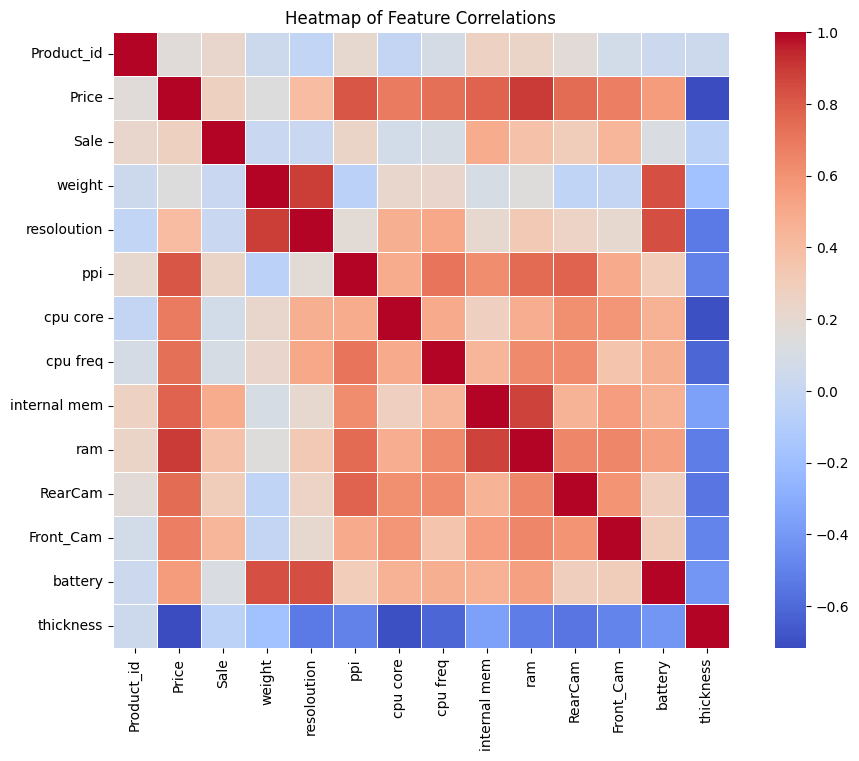

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_28200\3189084072.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




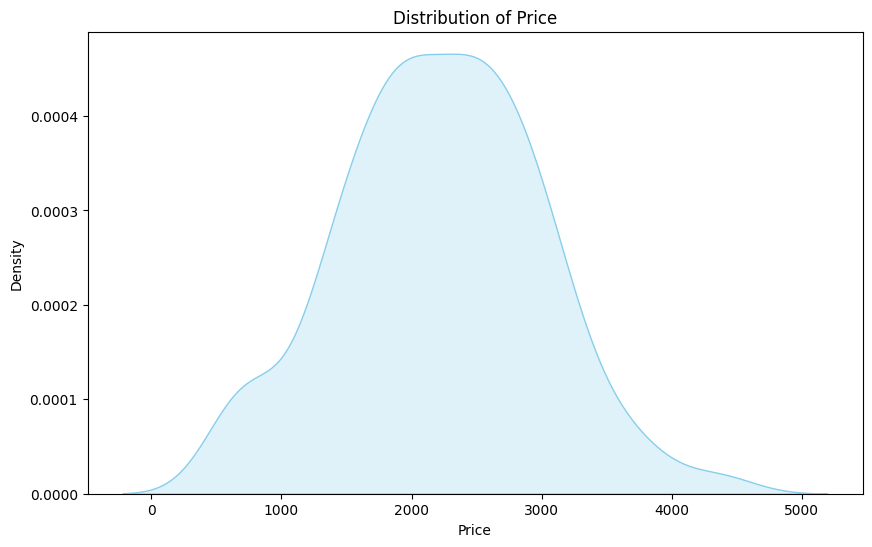

In [7]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df['Price'], shade=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [9]:
blue_palette = [
    '#1f77b4',
    '#87CEEB',
    '#2ca02c',
    '#4F94CD',
    '#00BFFF',
    '#32CD32',
    '#66CDAA',
    '#4682B4'
]

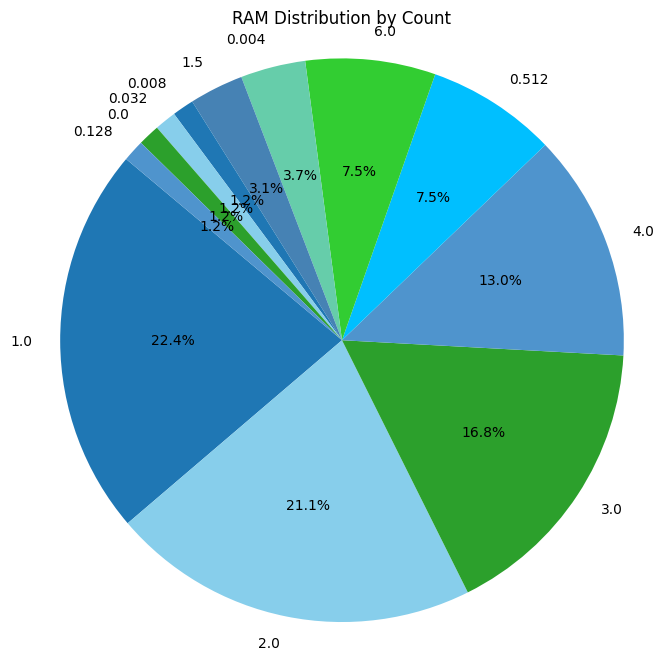

In [10]:
sale_counts = df['ram'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sale_counts, labels=sale_counts.index, autopct='%1.1f%%', startangle=140,colors=blue_palette)
plt.title('RAM Distribution by Count')
plt.axis('equal')
plt.show()

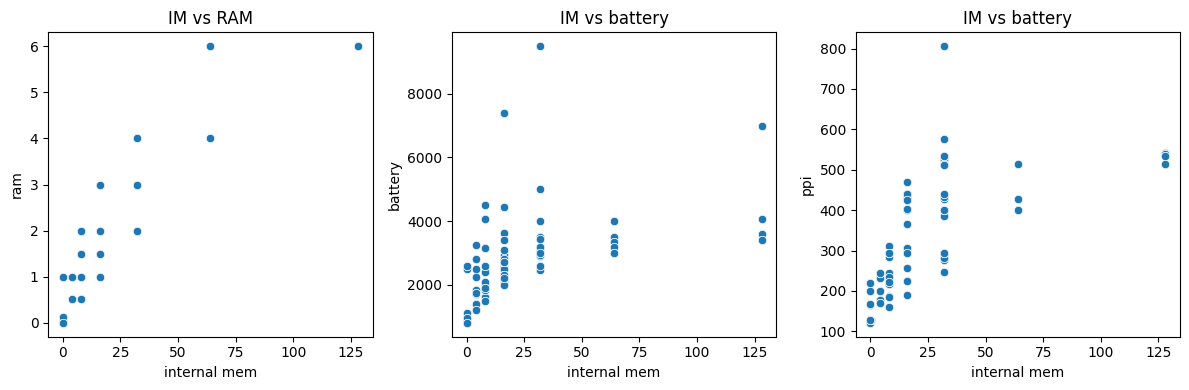

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# I use the  features have more relatioship with IM
features = ['ram', 'battery', 'ppi']
titles = ['IM vs RAM', 'IM vs battery', 'IM vs battery']

for ax, feature, title in zip(axes.flatten(), features, titles):
    sns.scatterplot(x='internal mem', y=feature, data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('internal mem')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

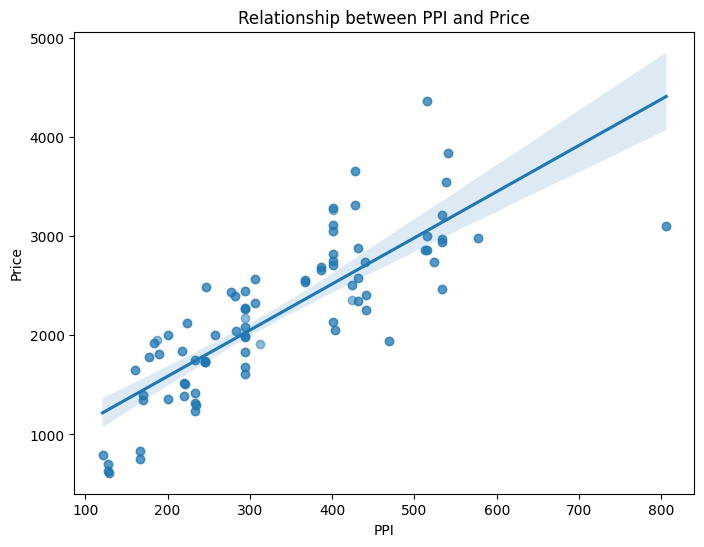

In [12]:
plt.figure(figsize=(8, 6))
sns.regplot(x='ppi', y='Price', data=df,scatter_kws={'alpha':0.5})
plt.title('Relationship between PPI and Price')
plt.xlabel('PPI')
plt.ylabel('Price')
plt.show()

In [13]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness
skewness = df[num_cols].skew().sort_values(ascending=False)

skewness

Sale            4.269384
weight          3.981756
internal mem    2.389683
battery         2.092660
thickness       1.587680
resoloution     1.176110
Front_Cam       1.169750
ram             0.792698
ppi             0.602503
RearCam         0.106929
Price           0.052347
cpu core       -0.009077
Product_id     -0.216869
cpu freq       -0.512663
dtype: float64

In [14]:
# Identify highly skewed variables
high_skew = skewness[abs(skewness) > 1]
high_skew

Sale            4.269384
weight          3.981756
internal mem    2.389683
battery         2.092660
thickness       1.587680
resoloution     1.176110
Front_Cam       1.169750
dtype: float64

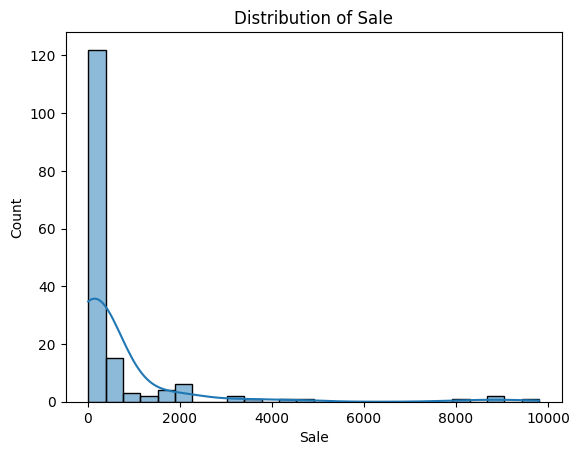

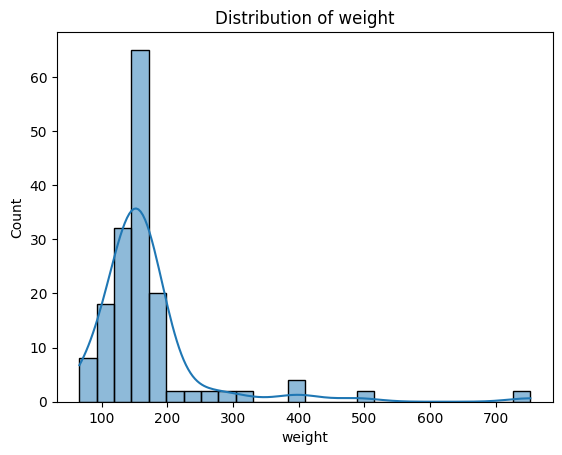

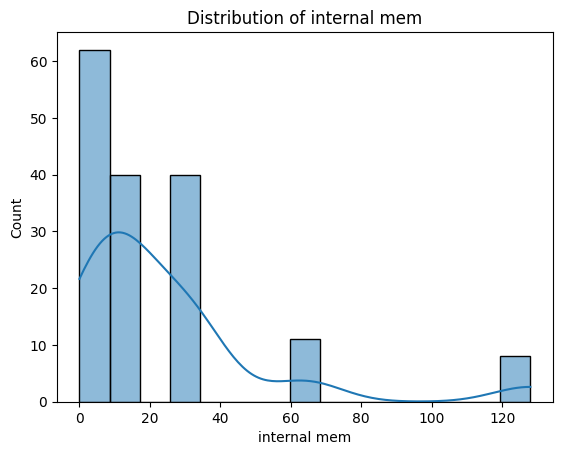

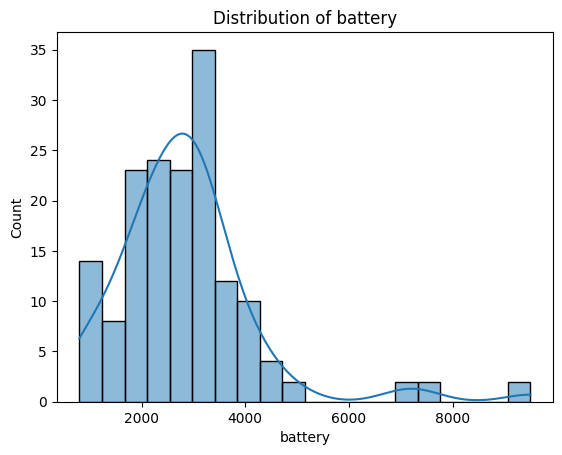

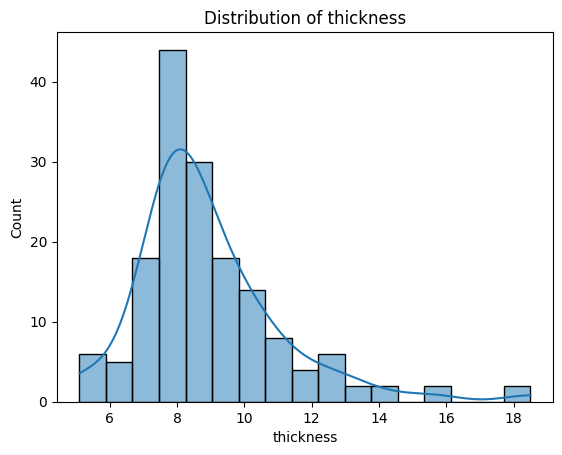

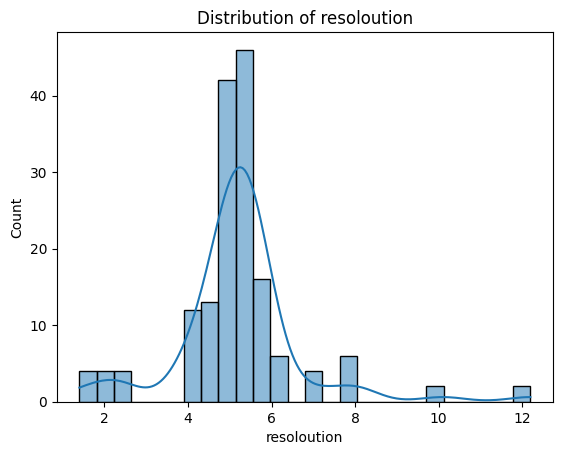

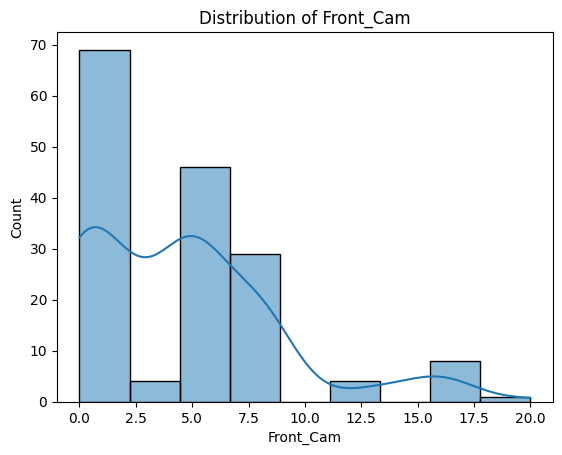

In [15]:
for col in high_skew.index:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [16]:
for col in high_skew.index:
    df[col] = np.log1p(df[col])  # log(1 + x)


#Recheck skewness:

df[high_skew.index].skew()

Sale            0.614823
weight          1.322798
internal mem   -0.621898
battery        -0.361261
thickness       0.591625
resoloution    -1.068191
Front_Cam      -0.316747
dtype: float64

In [17]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Check outliers for each numeric column
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")

Product_id: 0 outliers
Price: 2 outliers
Sale: 0 outliers
weight: 22 outliers
resoloution: 26 outliers
ppi: 2 outliers
cpu core: 0 outliers
cpu freq: 10 outliers
internal mem: 16 outliers
ram: 0 outliers
RearCam: 0 outliers
Front_Cam: 0 outliers
battery: 16 outliers
thickness: 10 outliers


In [25]:
X = df.drop(["Price","Product_id","Sale"], axis=1)
y = df['Price']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (112, 11)
y_train shape: (112,)
X_test shape: (49, 11)
y_test shape: (49,)


In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train R2: 0.9460950054332367
Test R2: 0.929558039363939


In [30]:
import joblib
joblib.dump(lr, 'cellphone_linear_model.pkl') 
joblib.dump(scaler, 'cellphone_scaler.pkl')

['cellphone_scaler.pkl']